In [1]:
pip install --user opencv-contrib-python

     ---------------------------------------- 44.9/44.9 MB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("ani.jpg")

In [3]:
# color conversion 
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [4]:
# Scale Invariance
sc_iv1 = cv2.pyrDown(rgb)
sc_iv2 = cv2.pyrDown(sc_iv1)
num_rows, num_cols = sc_iv2.shape[:2]
print(sc_iv2)

[[[ 21  22  26]
  [ 21  22  26]
  [ 22  23  27]
  ...
  [ 92  93  98]
  [ 93  94  99]
  [ 94  95 100]]

 [[ 21  22  26]
  [ 21  22  26]
  [ 22  23  27]
  ...
  [ 93  94  99]
  [ 93  94  99]
  [ 95  96 101]]

 [[ 21  22  26]
  [ 21  22  26]
  [ 22  23  27]
  ...
  [ 95  96 101]
  [ 95  96 101]
  [ 95  96 101]]

 ...

 [[ 41  44  49]
  [ 41  44  49]
  [ 40  43  48]
  ...
  [125  70  49]
  [127  72  51]
  [128  73  51]]

 [[ 40  43  48]
  [ 40  43  48]
  [ 40  43  48]
  ...
  [125  70  49]
  [127  72  51]
  [128  73  52]]

 [[ 40  43  48]
  [ 41  44  49]
  [ 40  43  48]
  ...
  [125  70  49]
  [127  72  51]
  [128  73  52]]]


In [5]:
cv2.imshow("o",img)
cv2.waitKey(0)
cv2.imshow("First scale",sc_iv1)
cv2.waitKey(0)
cv2.imshow("Second scale",sc_iv2)
cv2.waitKey(0)

-1

In [6]:
#Rotation invariance
rot_iv = cv2.getRotationMatrix2D((num_cols/2, num_rows/2),90,0.5)

In [7]:
# Affine Transformation
aff = cv2.warpAffine(sc_iv1, rot_iv,(num_cols, num_rows))

In [8]:
# Color Conversion
rot_gray = cv2.cvtColor(aff, cv2.COLOR_RGB2BGR)

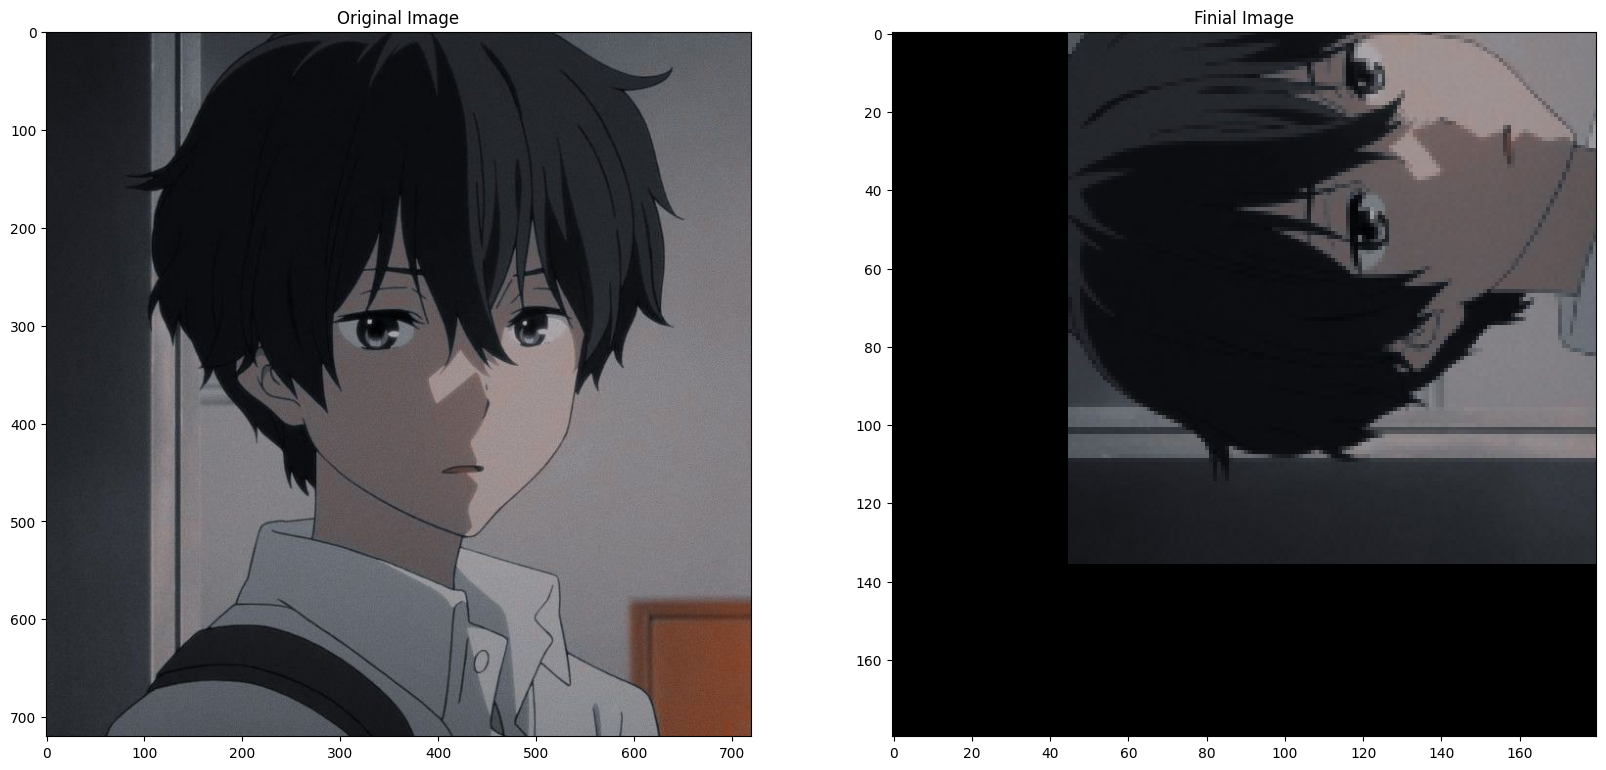

In [9]:
#Rotational Display
fx, plots = plt.subplots(1,2, figsize=(20,10))

plots[0].set_title("Original Image")
plots[0].imshow(rgb)

plots[1].set_title("Finial Image")
plots[1].imshow(aff)

## Scale Invariant Feature Transform (SIFT)

In [10]:
sift = cv2.xfeatures2d.SIFT_create()

In [11]:
# Detect And Compute
train_kp, train_des = sift.detectAndCompute(gray, None)
test_kp, test_des = sift.detectAndCompute(rot_gray, None)

In [12]:
# Keypoints
kp_wo_size = np.copy(rgb)
kp_w_size = np.copy(rgb)

In [13]:
# Drawing Keypoints
cv2.drawKeypoints(rgb, train_kp, kp_wo_size, color = (0,255,0))
cv2.drawKeypoints(rgb, train_kp, kp_w_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

array([[[ 21,  22,  26],
        [ 21,  22,  26],
        [ 21,  22,  26],
        ...,
        [ 95,  96, 101],
        [ 95,  96, 101],
        [ 95,  96, 101]],

       [[ 21,  22,  26],
        [ 21,  22,  26],
        [ 21,  22,  26],
        ...,
        [ 96,  97, 102],
        [ 96,  97, 102],
        [ 95,  96, 101]],

       [[ 21,  22,  26],
        [ 21,  22,  26],
        [ 21,  22,  26],
        ...,
        [ 96,  97, 102],
        [ 97,  98, 103],
        [ 96,  97, 102]],

       ...,

       [[ 42,  45,  50],
        [ 41,  44,  49],
        [ 41,  44,  49],
        ...,
        [129,  74,  53],
        [123,  68,  47],
        [128,  73,  52]],

       [[ 44,  47,  52],
        [ 43,  46,  51],
        [ 41,  44,  49],
        ...,
        [131,  76,  55],
        [127,  72,  51],
        [132,  77,  56]],

       [[ 46,  49,  54],
        [ 44,  47,  52],
        [ 40,  43,  48],
        ...,
        [135,  80,  59],
        [129,  74,  53],
        [134,  79,  58]]

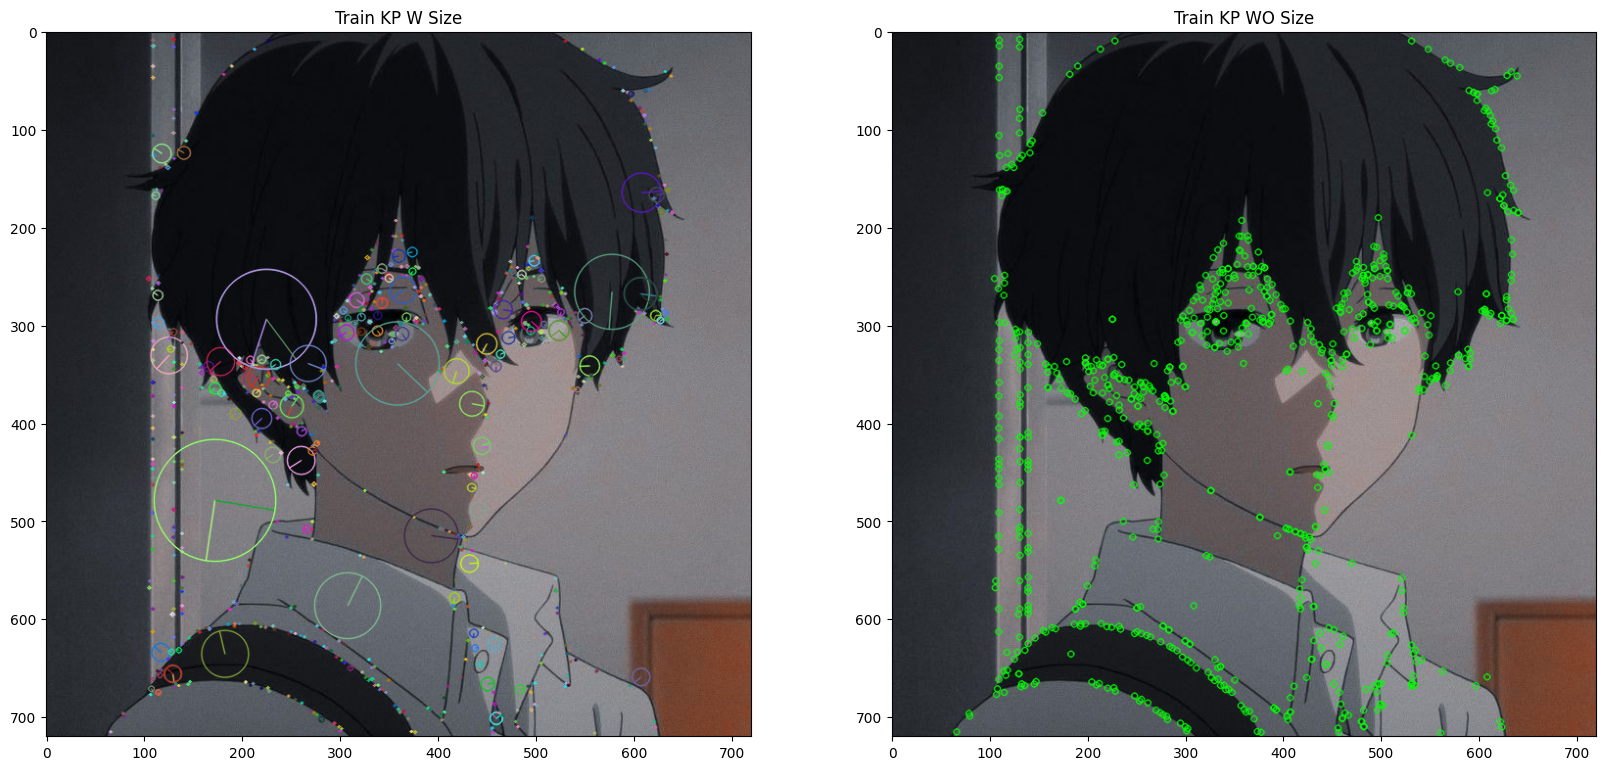

In [14]:
## Keypoints Display
fx, plots = plt.subplots(1,2, figsize=(20,10))

plots[0].set_title("Train KP W Size")
plots[0].imshow(kp_w_size, cmap='gray')

plots[1].set_title("Train KP WO Size")
plots[1].imshow(kp_wo_size, cmap='gray')

## BRUTE FORCE MATCHER OBJECT

In [15]:
bfm = cv2.BFMatcher(cv2.NORM_L2,crossCheck=False)

In [16]:
# Matching
match = bfm.match(train_des, test_des)

In [17]:
# Sorting
match = sorted(match, key = lambda x : x.distance)

In [18]:
# Drawing Matches
result = cv2.drawMatches(rgb, train_kp, rot_gray, test_kp, match, rot_gray, flags = 2) 

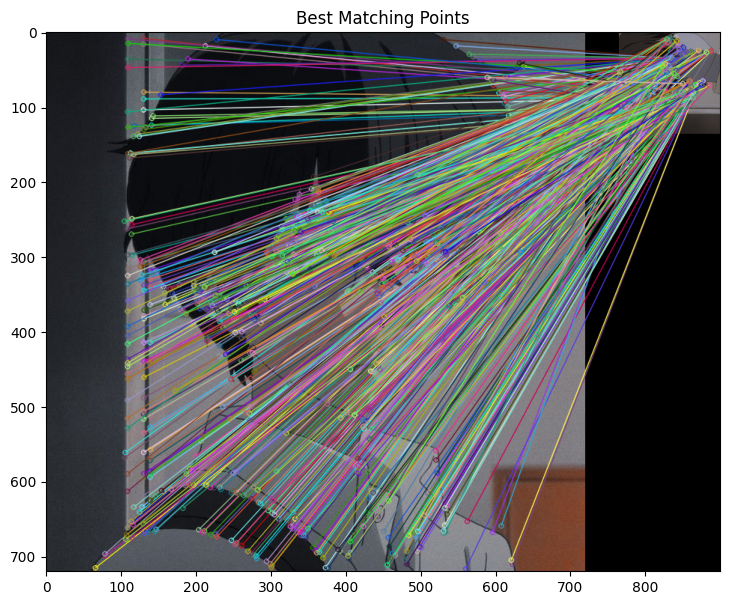

In [19]:
# Display Matching
plt.rcParams["figure.figsize"] = [14.0,7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.show()